In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

In [111]:
df = pd.read_csv("https://raw.githubusercontent.com/Bruteforce004/Cleaned-data-of-Indian-Forests/main/Land%20use%20classification%20in%20India.csv")
df.head()

,Unnamed: 0,Classification,2010-11,2011-12,2012-13,2013-14,2014-15
0,0,I. Geographical area,328.73,328.73,328.73,328.73,328.73
1,1,II. Reporting area for land utilisation statis...,307.48,307.39,307.49,307.80,307.82
2,2,1.Forests,71.59,71.60,71.57,71.83,71.79
3,3,2. Not available for cultivation (a+b),43.58,43.53,43.58,43.86,43.88
4,4,(a) Non-agricultural uses,26.40,26.31,26.50,26.91,26.88


In [112]:
df1 = df.drop(df.columns[[0,1]],axis=1)
df1.head()

,2010-11,2011-12,2012-13,2013-14,2014-15
0,328.73,328.73,328.73,328.73,328.73
1,307.48,307.39,307.49,307.80,307.82
2,71.59,71.60,71.57,71.83,71.79
3,43.58,43.53,43.58,43.86,43.88
4,26.40,26.31,26.50,26.91,26.88


In [113]:
df1.drop(labels=[4,5,7,8,9,11,12], axis=0, inplace=True)
df1.head()

,2010-11,2011-12,2012-13,2013-14,2014-15
0,328.73,328.73,328.73,328.73,328.73
1,307.48,307.39,307.49,307.80,307.82
2,71.59,71.60,71.57,71.83,71.79
3,43.58,43.53,43.58,43.86,43.88
6,26.15,26.11,26.08,25.83,25.83


In [114]:
Clas=['Geographical area','Reporting area for land utilisation statistics','Forests','Not available for cultivation','Other uncultivated land excluding fallow land', 'Fallow land' ,'Net area sown','Area sown more than once','Gross cropped area','Cropping intensity', 'Net irrigated area', 'Gross irrigated area']

In [115]:
df1['Classification']=Clas

In [116]:
df1.head()

,2010-11,2011-12,2012-13,2013-14,2014-15,Classification
0,328.73,328.73,328.73,328.73,328.73,Geographical area
1,307.48,307.39,307.49,307.80,307.82,Reporting area for land utilisation statistics
2,71.59,71.60,71.57,71.83,71.79,Forests
3,43.58,43.53,43.58,43.86,43.88,Not available for cultivation
6,26.15,26.11,26.08,25.83,25.83,Other uncultivated land excluding fallow land


In [117]:
df1=df1.set_index('Classification')
df1

,2010-11,2011-12,2012-13,2013-14,2014-15
Classification,,,,,
Geographical area,328.73,328.73,328.73,328.73,328.73
Reporting area for land utilisation statistics,307.48,307.39,307.49,307.80,307.82
Forests,71.59,71.60,71.57,71.83,71.79
Not available for cultivation,43.58,43.53,43.58,43.86,43.88
Other uncultivated land excluding fallow land,26.15,26.11,26.08,25.83,25.83
Fallow land,24.60,25.18,26.32,24.85,26.18
Net area sown,141.56,140.98,139.94,141.43,140.13
Area sown more than once,56.12,54.82,54.31,59.52,58.23
Gross cropped area,197.68,195.80,194.25,200.95,198.36


C:\Users\Anjali\anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


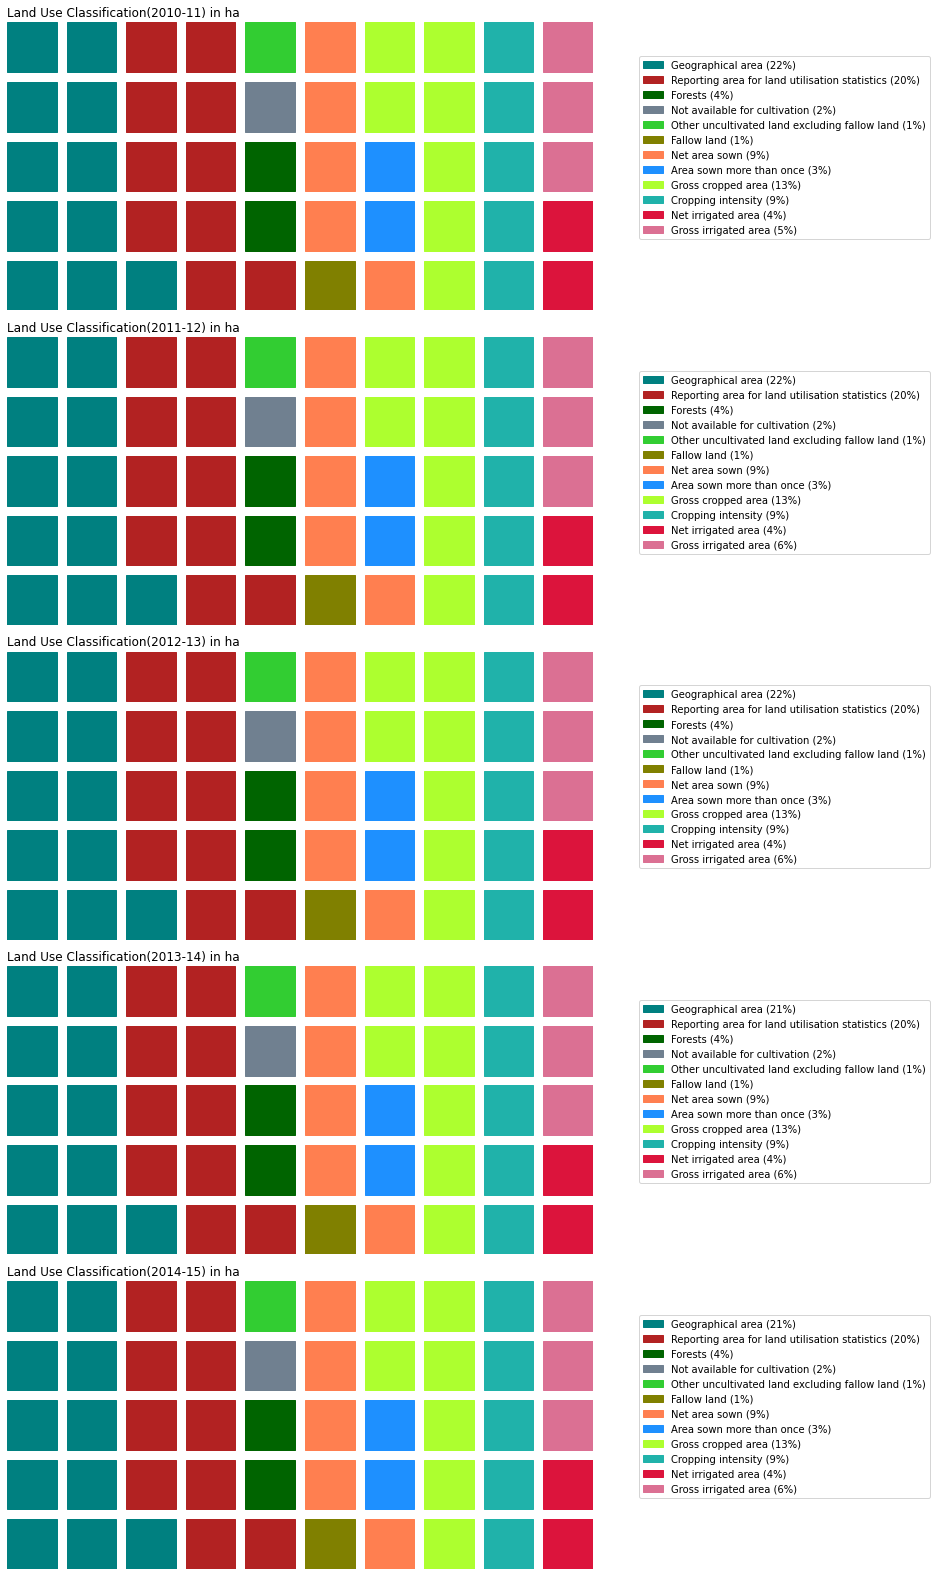

In [124]:
fig = plt.figure(
    figsize=[12,22],
    FigureClass=Waffle,
    rows=5,
    columns=10,
    colors=("teal", "firebrick", "darkgreen", "slategrey", 'limegreen', 'olive','coral','dodgerblue', 'greenyellow',
            'lightseagreen','crimson','palevioletred'),
    plots={
        '511': {
            'values' : df1['2010-11'],
           'title': {
                'label': 'Land Use Classification(2010-11) in ha',
                'loc': 'left'
            },
            'labels' : [f"{k} ({int(v / df1['2010-11'].sum() * 100)}%)" for k, v in df1['2010-11'].items()],
            'legend' : {
                    # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
                'loc': 'upper left', 'bbox_to_anchor': (1.07,0.9), 'fontsize': 10
            }
        },
          '512' : {
              'values' : df1['2011-12'],
            'title': {
                'label': 'Land Use Classification(2011-12) in ha',
                'loc': 'left'
            },
              'labels' : [f"{k} ({int(v / df1['2011-12'].sum() * 100)}%)" for k, v in df1['2011-12'].items()],
            'legend' : {
                'loc': 'upper left', 'bbox_to_anchor': (1.07,0.9), 'fontsize': 10
             }
            },
            '513' : {
              'values' : df1['2012-13'],
            'title': {
                'label': 'Land Use Classification(2012-13) in ha',
                'loc': 'left'
            },
              'labels' : [f"{k} ({int(v / df1['2012-13'].sum() * 100)}%)" for k, v in df1['2012-13'].items()],
            'legend' : {
                'loc': 'upper left', 'bbox_to_anchor': (1.07,0.9), 'fontsize': 10
            }
         },
        '514' : {
              'values' : df1['2013-14'],
            'title': {
                'label': 'Land Use Classification(2013-14) in ha',
                'loc': 'left'
            },
              'labels' : [f"{k} ({int(v / df1['2013-14'].sum() * 100)}%)" for k, v in df1['2013-14'].items()],
            'legend' : {
                'loc': 'upper left', 'bbox_to_anchor': (1.07,0.9), 'fontsize': 10
            }
         },
        '515' : {
              'values' : df1['2014-15'],
            'title': {
                'label': 'Land Use Classification(2014-15) in ha',
                'loc': 'left'
            },
              'labels' : [f"{k} ({int(v / df1['2014-15'].sum() * 100)}%)" for k, v in df1['2014-15'].items()],
            'legend' : {
                'loc': 'upper left', 'bbox_to_anchor': (1.07,0.9), 'fontsize': 10
            }
         },
    }
        
)
plt.savefig('Land_Use_Classification(2010-2015).png', transparent=False, bbox_inches='tight', pad_inches=0, dpi = 1200 )
plt.show()

*Interpretation : There has been seen no major changes in the land usage trends from 2010 to 2015.*

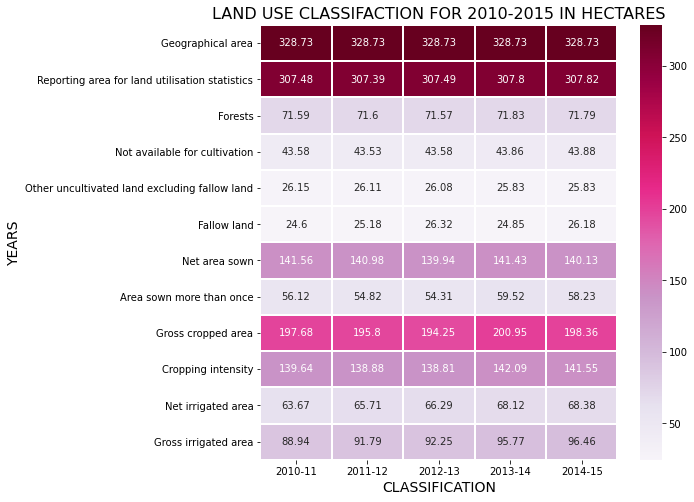

In [126]:
plt.figure(figsize = (8,8))

sns.heatmap(df1, fmt='g',linewidths=1,annot=True, annot_kws={"size":10}, cmap = 'PuRd')

plt.title("LAND USE CLASSIFACTION FOR 2010-2015 IN HECTARES", fontsize=16)
plt.xlabel("CLASSIFICATION", fontsize = 14)
plt.ylabel("YEARS" , fontsize=14)

plt.savefig('Land_Use_Classification2015.png', transparent=False, bbox_inches='tight', pad_inches=0, dpi=1200)
plt.show()
plt.close()